<a href="https://colab.research.google.com/github/BDouchet/SDATA/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

# MNIST

MNIST is a dataset made of 70k hand written digits (60k training and 10k test). Each entry is a 28x28 b&w image. 

## Load of mnist dataset with Tensorflow

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


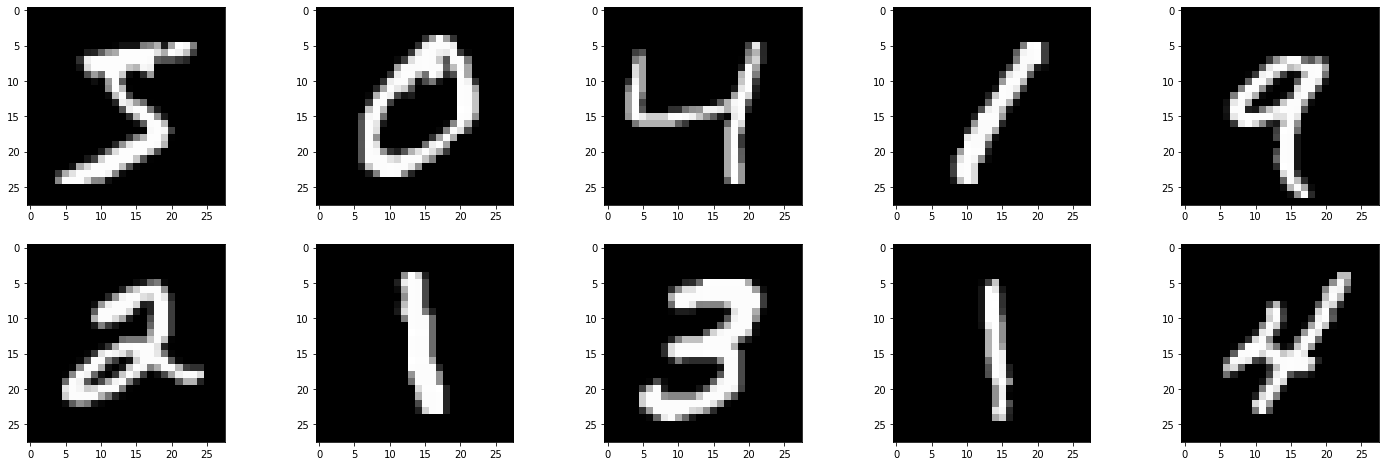

In [3]:
_,axs=plt.subplots(ncols=5,nrows=2,figsize=(25,8))
for i,ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(x_train[i],cmap='gray')

## Data Preprocess :

*  Set image values from a range of 0 to 255 to a range of 0 to 1
*  Add a dimension to the image : (28,28) -> (28,28,1)
*  One hot encoding : [6] -> [0,0,0,0,0,0,1,0,0,0]

In [4]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Creation and Training of a simple CNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

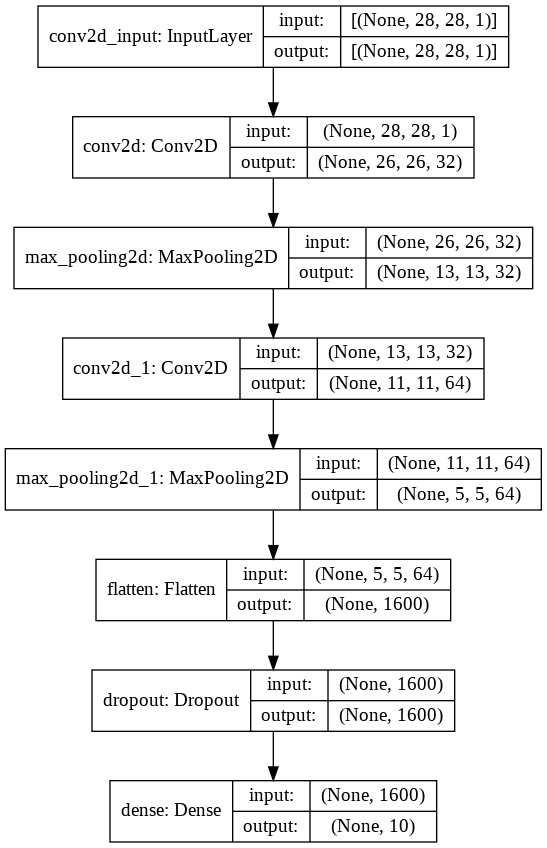

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu",input_shape=(28,28,1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

model.summary()
tf.keras.utils.plot_model(model,show_shapes=True)

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4461 - acc: 0.8630 - val_loss: 0.0605 - val_acc: 0.9800
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0830 - acc: 0.9729 - val_loss: 0.0410 - val_acc: 0.9848
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0644 - acc: 0.9799 - val_loss: 0.0339 - val_acc: 0.9889
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0553 - acc: 0.9828 - val_loss: 0.0326 - val_acc: 0.9898
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0459 - acc: 0.9858 - val_loss: 0.0302 - val_acc: 0.9899
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0421 - acc: 0.9863 - val_loss: 0.0287 - val_acc: 0.9905
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0407 - acc: 0.9870 - val_loss: 0.0235 - val_acc: 0.9921
Epoch 8/20
1875/1875 [==============================] - 6s 3m

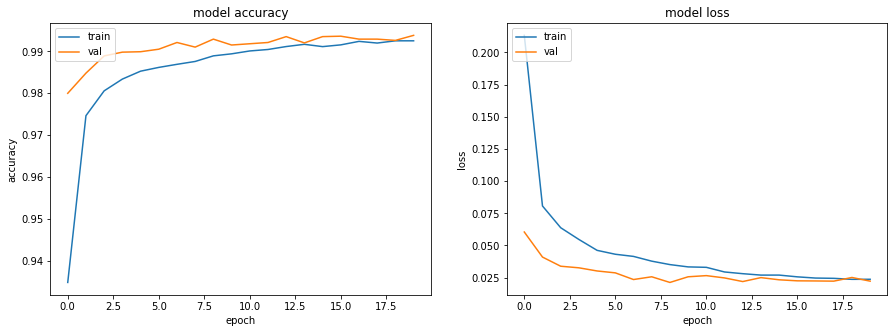

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

plt.show()

## Comparison of the accuracy between CNN and Trees

In [14]:
model.evaluate(x_test,y_test,verbose=0)[1]

0.9937999844551086

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(np.reshape(x_train,(x_train.shape[0],28*28)),[np.argmax(i) for i in y_train])
dt.score(np.reshape(x_test,(x_test.shape[0],28*28)),[np.argmax(i) for i in y_test])

0.8787

# Cifar 10

Canadian Institute For Advanced Research (CIFAR) is a 60k images dataset with a format of 32x32x3 (50k/10k for training/testing). The images are classified in 10 equally reparted classes :

airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

## Load dataset

In [7]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


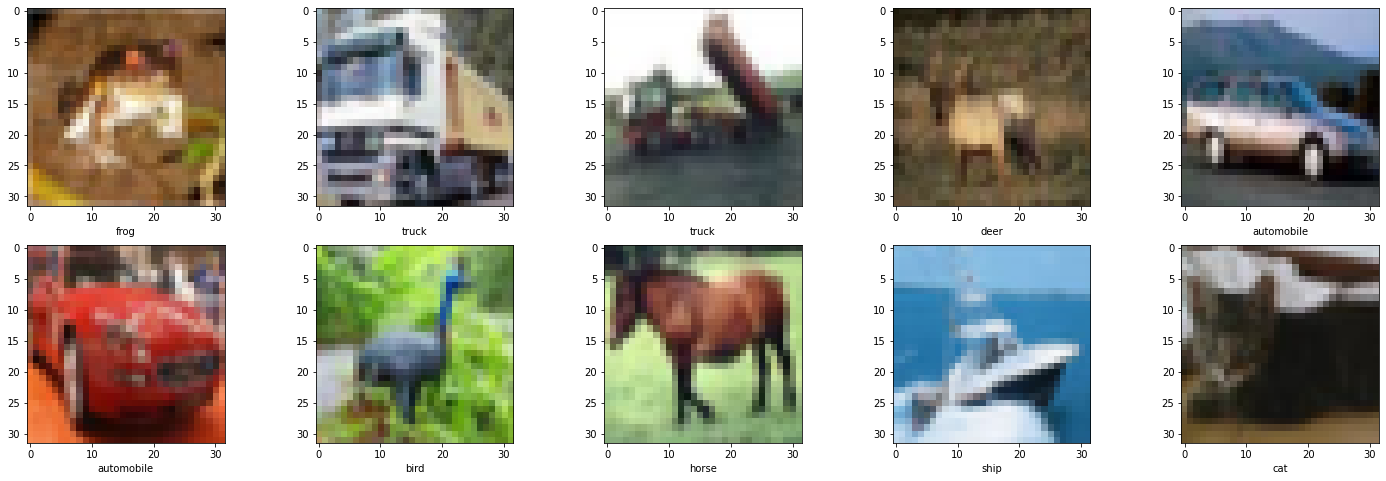

In [8]:
_,axs=plt.subplots(ncols=5,nrows=2,figsize=(25,8))
for i,ax in enumerate(axs.flatten()):
    plt.sca(ax)
    ax.set_xlabel(names[y_train[i][0]])
    plt.imshow(x_train[i],cmap='gray')

In [9]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Creation and Training of a reduced VGG

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)         

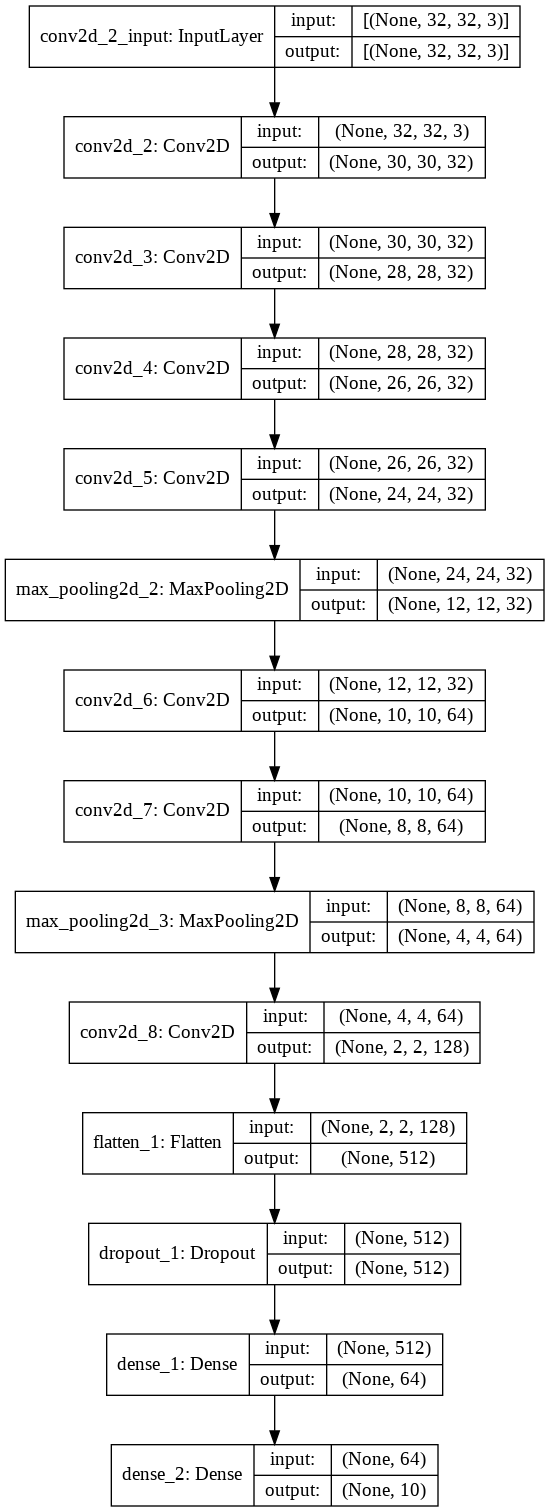

In [10]:
model=models.Sequential()
model.add(layers.Conv2D(32,3,activation='relu',input_shape=(32,32,3)))
for _ in range(3):
    model.add(layers.Conv2D(32,3,activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64,3,activation='relu'))
model.add(layers.Conv2D(64,3,activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(128,3,activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()
tf.keras.utils.plot_model(model,show_shapes=True)

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test),verbose=2)

Epoch 1/100
1563/1563 - 7s - loss: 1.7780 - acc: 0.3301 - val_loss: 1.4858 - val_acc: 0.4533
Epoch 2/100
1563/1563 - 6s - loss: 1.3957 - acc: 0.4921 - val_loss: 1.2708 - val_acc: 0.5383
Epoch 3/100
1563/1563 - 6s - loss: 1.2197 - acc: 0.5646 - val_loss: 1.1150 - val_acc: 0.6002
Epoch 4/100
1563/1563 - 6s - loss: 1.1003 - acc: 0.6106 - val_loss: 1.0284 - val_acc: 0.6294
Epoch 5/100
1563/1563 - 6s - loss: 1.0132 - acc: 0.6399 - val_loss: 1.0165 - val_acc: 0.6445
Epoch 6/100
1563/1563 - 6s - loss: 0.9526 - acc: 0.6651 - val_loss: 0.9480 - val_acc: 0.6703
Epoch 7/100
1563/1563 - 6s - loss: 0.8971 - acc: 0.6842 - val_loss: 0.9075 - val_acc: 0.6791
Epoch 8/100
1563/1563 - 6s - loss: 0.8523 - acc: 0.6997 - val_loss: 0.8768 - val_acc: 0.6966
Epoch 9/100
1563/1563 - 6s - loss: 0.8157 - acc: 0.7148 - val_loss: 0.8878 - val_acc: 0.6884
Epoch 10/100
1563/1563 - 6s - loss: 0.7873 - acc: 0.7235 - val_loss: 0.8564 - val_acc: 0.7089
Epoch 11/100
1563/1563 - 6s - loss: 0.7636 - acc: 0.7318 - val_loss: 

By plotting the training curves, I observe overfitting. To avoid it, it would be better to :
*  Performe data augmentation (flip, rotation, rescaling, shift...)
*  Decrease the number of parameters in the model
*  Add regularization techniques (Dropout, L1, L2)
*  Shuffle the dataset at each epoch

For my purpose, it is not necessary to fine tune the hyperparameters.

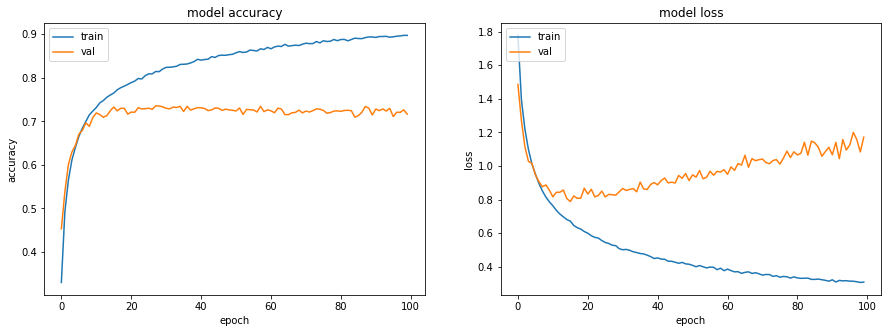

In [26]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

plt.show()

## Observation of the performances

In [13]:
from sklearn.metrics import confusion_matrix
yhat=model.predict(x_test)
y_test_lab=[np.argmax(y) for y in y_test]
y_hat_lab=[np.argmax(y) for y in yhat]
cm=confusion_matrix(y_test_lab,y_hat_lab)
cm

array([[773,  21,  57,  23,  26,   5,   3,  15,  62,  15],
       [ 28, 891,   5,  13,   4,   1,   7,   2,  16,  33],
       [ 69,   7, 591,  99, 110,  61,  33,  18,   9,   3],
       [ 20,  10,  74, 636,  73, 115,  34,  28,   7,   3],
       [ 13,   2,  67,  68, 757,  27,  25,  37,   2,   2],
       [ 10,   2,  39, 250,  48, 597,   9,  40,   1,   4],
       [  3,  11,  68, 125,  54,  18, 708,   6,   5,   2],
       [ 14,   3,  38,  62,  91,  57,   4, 722,   3,   6],
       [100,  57,  15,  28,   7,   3,   4,   5, 763,  18],
       [ 46, 129,  12,  38,  13,   4,   2,   8,  22, 726]])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test_lab,y_hat_lab,
                            target_names=names))

              precision    recall  f1-score   support

    airplane       0.72      0.77      0.74      1000
  automobile       0.79      0.89      0.84      1000
        bird       0.61      0.59      0.60      1000
         cat       0.47      0.64      0.54      1000
        deer       0.64      0.76      0.69      1000
         dog       0.67      0.60      0.63      1000
        frog       0.85      0.71      0.77      1000
       horse       0.82      0.72      0.77      1000
        ship       0.86      0.76      0.81      1000
       truck       0.89      0.73      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



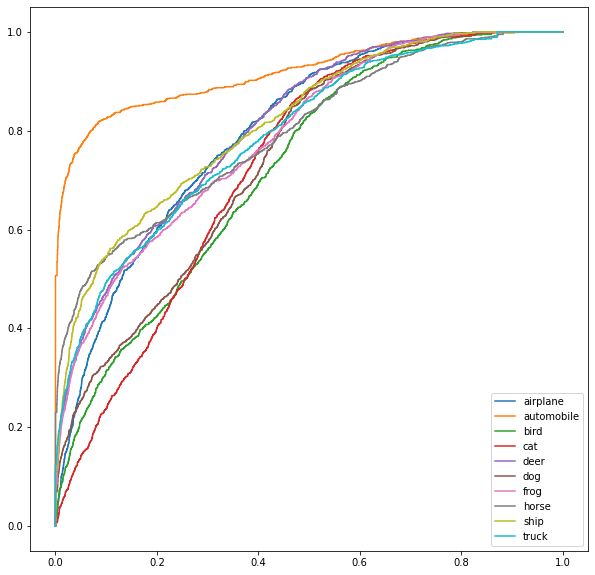

In [70]:
from sklearn.metrics import roc_curve

y_test_i=np.array([np.zeros(len(y_test_lab)) for _ in range(10)])
y_hat_prob=np.array([np.zeros(len(y_test_lab)) for _ in range(10)])

for i in range(10000):
    y_test_i[y_test_lab[i],i]=1
    y_hat_prob[:,i]=1-yhat[i][y_test_lab[i]]
    y_hat_prob[y_test_lab[i],i]=yhat[i][y_test_lab[i]]
    

plt.figure(figsize=(10,10))
for i in range(10):
    fpr, tpr, thresholds = roc_curve(y_test_i[i], y_hat_prob[i])
    plt.plot(fpr,tpr,label=names[i])
plt.legend(loc='lower right')
plt.show()


## Comparison with tree classifier

In [30]:
model.evaluate(x_test,y_test,verbose=0)[1]

0.7164000272750854

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(np.reshape(x_train,(x_train.shape[0],32*32*3)),[np.argmax(i) for i in y_train])
dt.score(np.reshape(x_test,(x_test.shape[0],32*32*3)),[np.argmax(i) for i in y_test])

0.2691

## Feature extractor

In [47]:
extractor0 = models.Model(inputs=model.inputs, outputs=model.layers[-8].output)

yhat0=extractor0.predict(x_test)
yhat0.shape

(10000, 10, 10, 64)

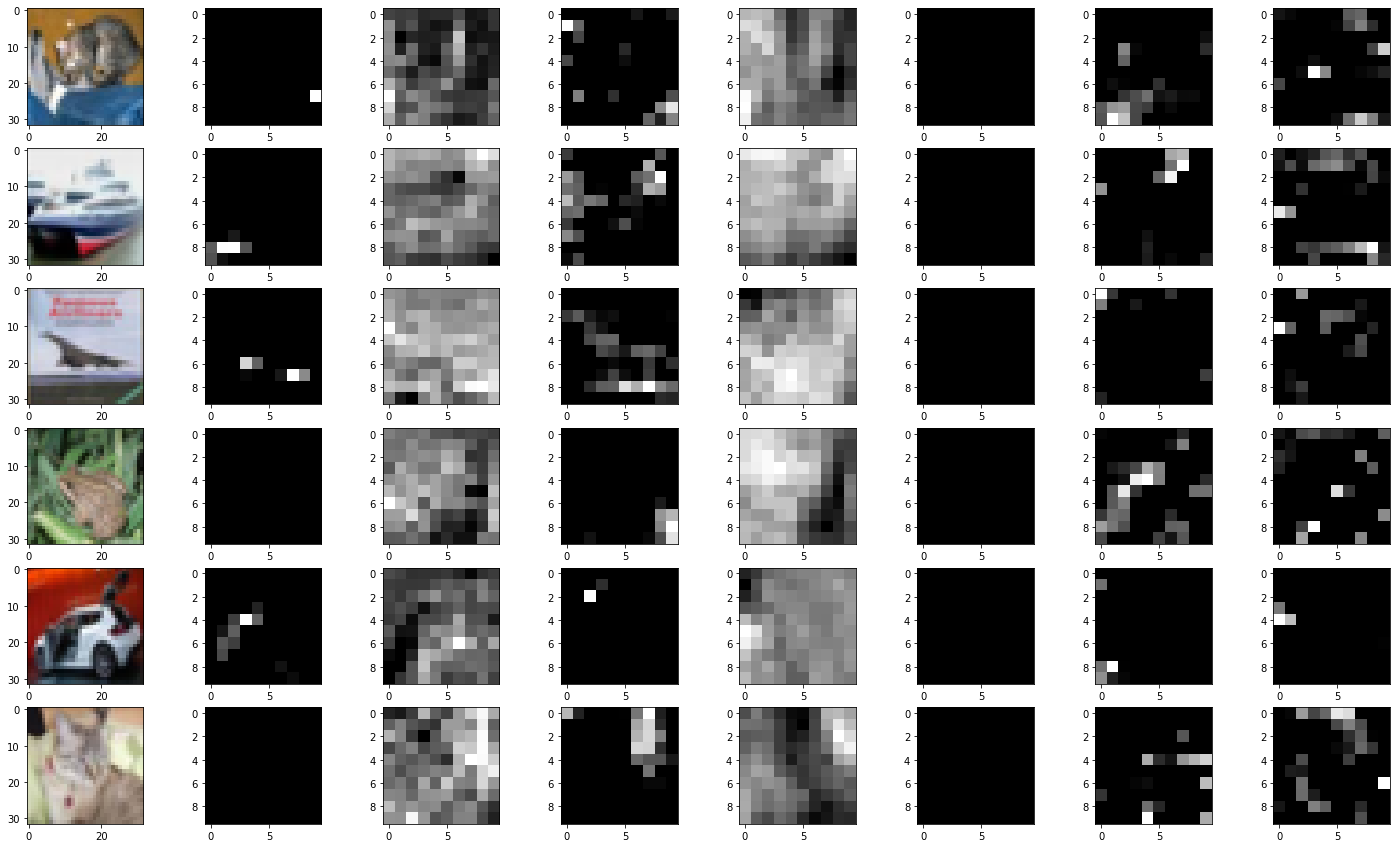

In [56]:
_,axs=plt.subplots(ncols=8,nrows=6,figsize=(25,15))

for i,ax in enumerate(axs.flatten()):
    plt.sca(ax)
    if i%8==0:
        plt.imshow(x_test[i//5])
    else:
        plt.imshow(yhat0[i//5,:,:,i%8],cmap='gray')
plt.show()

## Feature extractor II

In [14]:
extractor1 = models.Model(inputs=model.inputs, outputs=model.layers[-2].output)

yhat1=extractor1.predict(x_test)
yhat1.shape

(10000, 64)

Text(0.5, 0, 'Perplexity = 30')

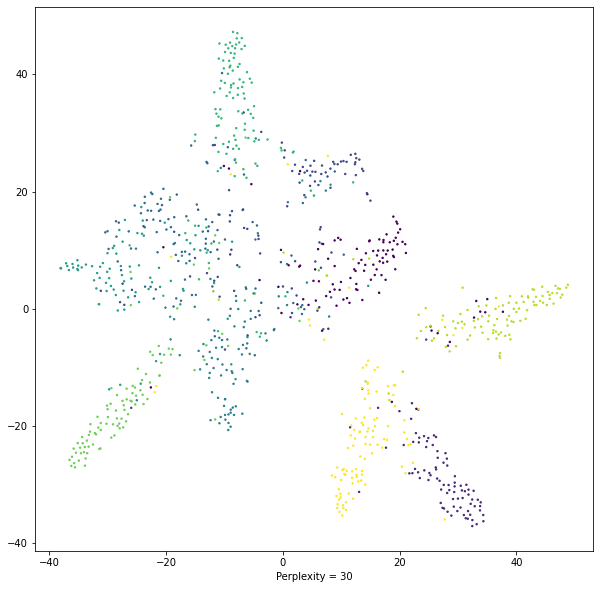

In [22]:
from sklearn.manifold import TSNE

plt.figure(figsize=(10,10))
df_embed=TSNE(perplexity=30).fit_transform(yhat1[:1000])
plt.scatter(df_embed[:,0],df_embed[:,1],c=y_test_lab[:1000],s=2)
plt.xlabel('Perplexity = 30')

